### Author: Aditi Kathalay

# The Sparks Internship Foundation Data Science and Business Analytics

## Task 1 Supervised ML Prediction Model
In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm

## Model Used: Linear Regression


### Steps:

- Step 1 - Importing the libraries
- Step 2 - Importing the dataset
- Step 3 - EDA
- Step 4 - Feature Engineering
- Step 5 - Preparation of Data
- Step 6 - Model Prediction
- Step 7 - Performance Metrics


## Step 1 : Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

## Step 2: Importing Dataset

In [2]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

## Step 3: EDA (Exploratory Data Analysis)

In [3]:
df.head()                  #First 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.head()                  #Last 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape                  #Total rows and columns

(25, 2)

### Checking for null values

In [6]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### "False" indicates no null values exist

### Using nunique() method to return unique values in the DataFrame

In [7]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [8]:
df.describe                 # returns description of data

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

<Axes: >

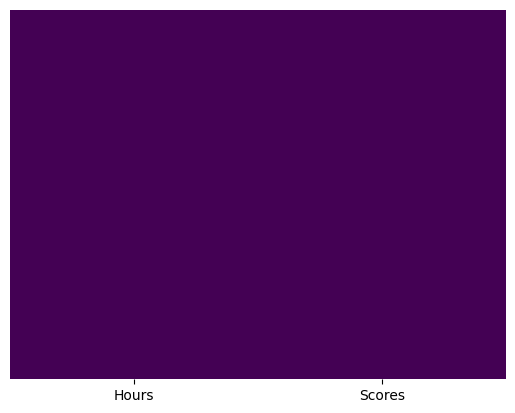

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Hours', ylabel='count'>

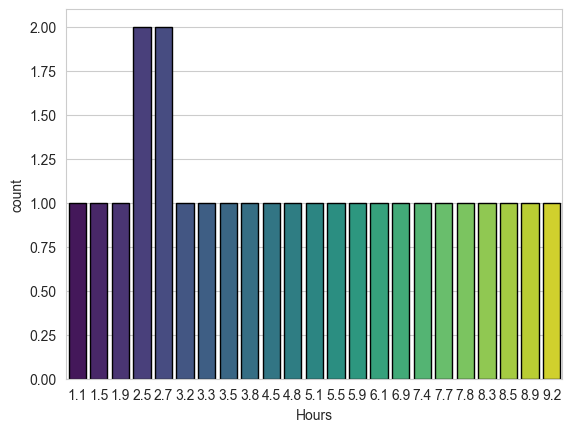

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Hours',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='Scores', ylabel='count'>

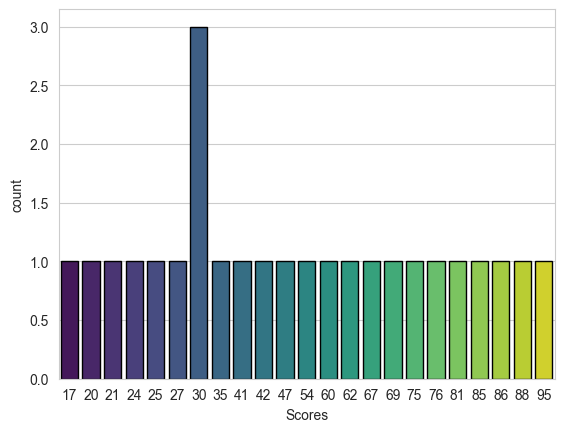

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Scores',data=df,palette='viridis',saturation=0.8,edgecolor="black")

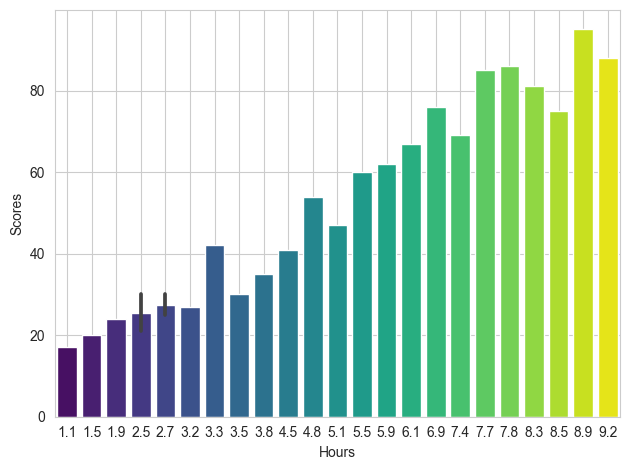

In [12]:
sns.barplot(x='Hours',y='Scores',data=df,palette='viridis',saturation=5.5)
plt.tight_layout()
plt.grid(True)
plt.show()

In [13]:
correlation = df.corr()

<Axes: >

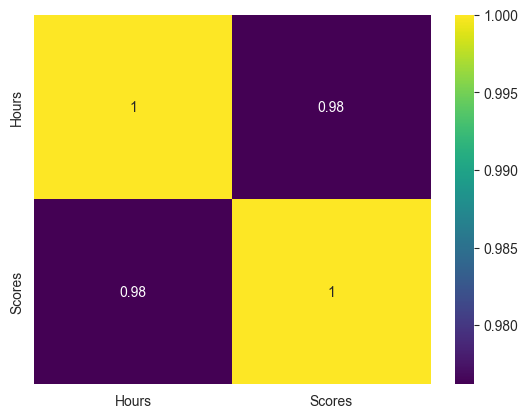

In [14]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap = 'viridis')

## Step 4: Feature Engineering

### Checking for outliers

<Axes: xlabel='Scores', ylabel='Density'>

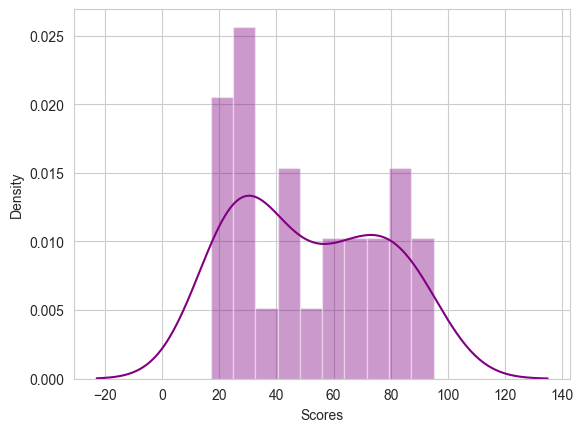

In [15]:
sns.distplot(df['Scores'],color='purple',bins=10)

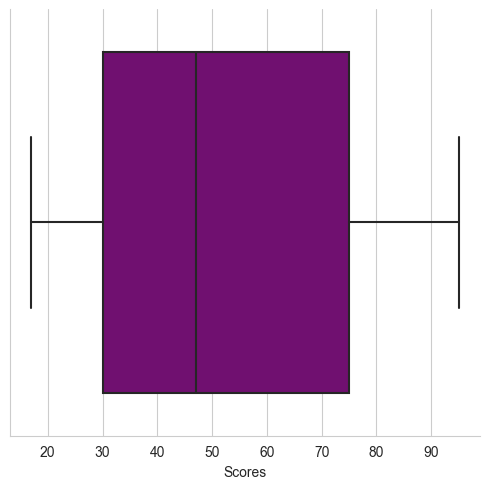

In [16]:
sns.catplot(x='Scores',kind='box',data=df,color='purple')

### No outliers exist

### Step 5 : Preparation of Data

In [17]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

### Step 6: Model Prediction

In [22]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [24]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [25]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [26]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


### Step 7: Performance Metrics

In [27]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [28]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [29]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MSE' : mean_squared_error(y_test,pred_lr),
    'MAE':mean_absolute_error(y_test, y_pred)
    })

pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr),
        '\nMean Absolute Error:',mean_absolute_error(y_test, y_pred))

Testing R2 Score:  94.54906892105355 
Testing mean squared:  21.598769307217406 
Mean Absolute Error: 4.183859899002975


In [30]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MSE','MAE'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score

,model,r2_score,MSE,MAE
0,Linear Regression,94.549069,21.598769,4.18386


## Thank You!